In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\santosh nandam\Downloads\air cargo supplychain.xlsx")
df.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed


In [3]:
duplicate_shipments = df[df.duplicated(subset=["Shipment ID"], keep=False)]
if not duplicate_shipments.empty:
    print("Duplicate Shipment IDs found:")
    print(duplicate_shipments)
else:
    print("No duplicate Shipment IDs found.")
df.head()

No duplicate Shipment IDs found.


,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
numerical_columns = ["Shipment Weight (kg)", "Shipment Volume (m³)", "Freight Cost (USD)", "Transit Time (hours)", "Customs Clearance Time (hours)"]
scaling_range = (-1, 1)
scaler = MinMaxScaler(feature_range=scaling_range)
df[numerical_columns] = scaler.fit_transform(df[numerical_columns]).round().astype(int)

In [6]:
df

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,0,-1,0,Air,UPS,-1,No,Yes,-1,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,1,0,1,Air,Lufthansa Cargo,-1,No,No,-1,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,0,-1,0,Air,FedEx,-1,No,No,1,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,0,-1,0,Rail,DHL,-1,Yes,No,0,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,0,-1,0,Air,DHL,0,No,No,-1,Rainy,Friday,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019996,ATL,DXB,-1,-1,-1,Air,UPS,0,Yes,Yes,0,Clear,Monday,Delayed
19996,SHIP019997,MIA,NRT,0,1,0,Air,FedEx,0,Yes,No,0,Foggy,Friday,On-Time
19997,SHIP019998,LAX,LHR,0,0,0,Air,UPS,0,Yes,No,0,Clear,Monday,On-Time
19998,SHIP019999,DFW,HKG,-1,-1,-1,Rail,FedEx,-1,No,No,0,Clear,Thursday,On-Time


In [7]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ["Origin Airport", "Destination Airport", "Mode of Transport", "Weather Conditions", "Day of Week","Carrier Name"]
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [8]:
df["Temperature-Sensitive"] = df["Temperature-Sensitive"].map({"Yes": 1, "No": 0})
df["Perishable Goods"] = df["Perishable Goods"].map({"Yes": 1, "No": 0})
df["Delay Status"] = df["Delay Status"].map({"Delayed": 1, "On-Time": 0})

In [9]:
df.drop(['Shipment ID'],axis=1,inplace=True)

In [10]:
df

,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,6,3,0,-1,0,0,4,-1,0,1,-1,0,4,1
1,0,5,1,0,1,0,3,-1,0,0,-1,0,4,0
2,1,2,0,-1,0,0,2,-1,0,0,1,0,6,0
3,6,1,0,-1,0,1,0,-1,1,0,0,2,3,0
4,5,2,0,-1,0,0,0,0,0,0,-1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,-1,-1,-1,0,4,0,1,1,0,0,1,1
19996,4,4,0,1,0,0,2,0,1,0,0,1,0,0
19997,3,3,0,0,0,0,4,0,1,0,0,0,1,0
19998,1,2,-1,-1,-1,1,2,-1,0,0,0,0,4,0


In [11]:
corr_matrix = df.corr()

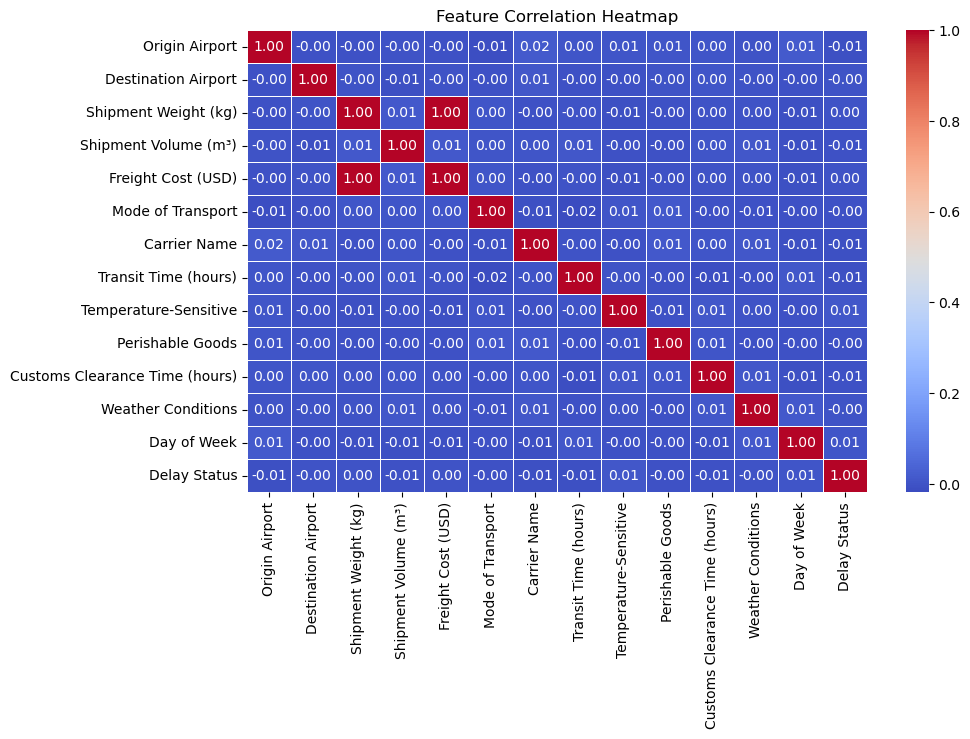

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
df['Shipment Density'] = df['Shipment Weight (kg)'] * df['Shipment Volume (m³)']
df.drop(['Shipment Weight (kg)','Shipment Volume (m³)'],axis=1,inplace=True)

In [14]:
df

,Origin Airport,Destination Airport,Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status,Shipment Density
0,6,3,0,0,4,-1,0,1,-1,0,4,1,0
1,0,5,1,0,3,-1,0,0,-1,0,4,0,0
2,1,2,0,0,2,-1,0,0,1,0,6,0,0
3,6,1,0,1,0,-1,1,0,0,2,3,0,0
4,5,2,0,0,0,0,0,0,-1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,-1,0,4,0,1,1,0,0,1,1,1
19996,4,4,0,0,2,0,1,0,0,1,0,0,0
19997,3,3,0,0,4,0,1,0,0,0,1,0,0
19998,1,2,-1,1,2,-1,0,0,0,0,4,0,1


In [15]:
X=df.drop('Delay Status', axis=1).values
Y=df['Delay Status'].values

In [16]:
X

array([[ 6,  3,  0, ...,  0,  4,  0],
       [ 0,  5,  1, ...,  0,  4,  0],
       [ 1,  2,  0, ...,  0,  6,  0],
       ...,
       [ 3,  3,  0, ...,  0,  1,  0],
       [ 1,  2, -1, ...,  0,  4,  1],
       [ 6,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [17]:
Y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=73)

In [127]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [129]:
y_pred=LR.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.50275

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=42)

In [215]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [217]:
Y_pred = clf.predict(X_test)
Y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [219]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.51125

In [383]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=73)

In [385]:
from sklearn.ensemble import RandomForestClassifier
clfs = RandomForestClassifier(n_estimators=15)
clfs.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=15)

In [386]:
Y_Pred = clfs.predict(X_test)
Y_Pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [387]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_Pred)

0.526

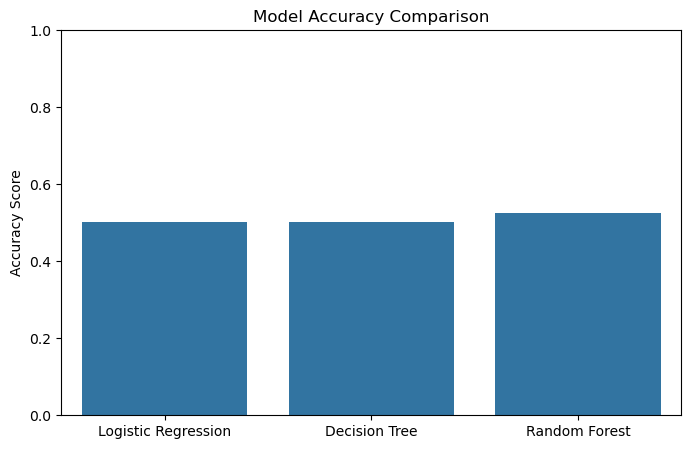

In [397]:
model_names=["Logistic Regression", "Decision Tree", "Random Forest"]
accuracies=[accuracy_score(Y_test, Y_pred),accuracy_score(Y_test, Y_pred),accuracy_score(Y_test, Y_Pred),]
plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

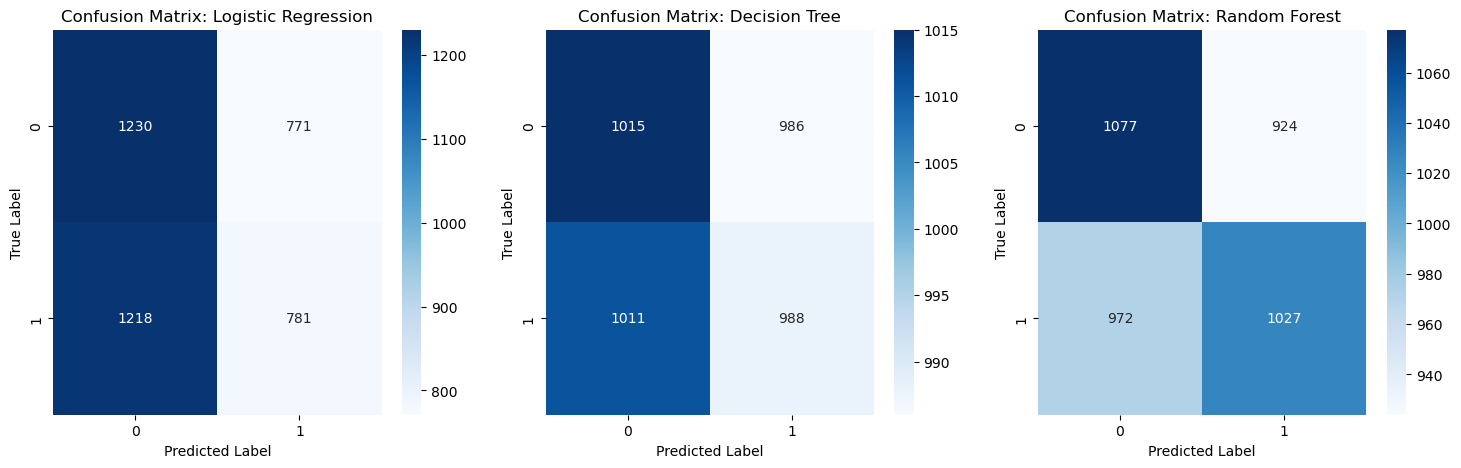

In [407]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, model, pred, title in zip(axes, [LR,clf,clfs], [y_pred, Y_pred, Y_Pred], ["Logistic Regression", "Decision Tree", "Random Forest"]):
    sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix: {title}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.show()